In [6]:
class LinearRegression:
    '''
    A class which implements linear regression model with gradient descent.
    '''
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights, self.bias = None, None
        self.loss = []
        
    @staticmethod
    def _mean_squared_error(y, y_hat):
        '''
        Private method, used to evaluate loss at each iteration.
        
        :param: y - array, true values
        :param: y_hat - array, predicted values
        :return: float
        '''
        error = 0
        for i in range(len(y)):
            error += (y[i] - y_hat[i]) ** 2
        return error / len(y)
    
    def fit(self, X, y):
        '''
        Used to calculate the coefficient of the linear regression model.
        
        :param X: array, features
        :param y: array, true values
        :return: None
        '''
        # 1. Initialize weights and bias to zeros
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # 2. Perform gradient descent
        for i in range(self.n_iterations):
            # Line equation
            y_hat = np.dot(X, self.weights) + self.bias
            loss = self._mean_squared_error(y, y_hat)
            
            self.loss.append(loss)
            
            # Calculate derivatives
            partial_w = (1 / X.shape[0]) * (2 * np.dot(X.T, (y_hat - y)))
            print("partial_w printing",partial_w)
            partial_d = (1 / X.shape[0]) * (2 * np.sum(y_hat - y))
            print("partial_d printing", partial_d)
            # Update the coefficients
            self.weights -= self.learning_rate * partial_w
            self.bias -= self.learning_rate * partial_d
            
        print("printing y_hat", y_hat)
        print("printing weights", self.weights)
        print("printing bias", self.bias)
    def predict(self, X):
        '''
        Makes predictions using the line equation.
        
        :param X: array, features
        :return: array, predictions
        '''
        return np.dot(X, self.weights) + self.bias

In [7]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
X = data.data
y = data.target

In [8]:
print(X)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [9]:
print(y)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [10]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape
# X_train = np.dot(X_train,1000).astype(int)
# X_test = np.dot(X_test,1000).astype(int)
# y_train = np.dot(y_train,1000).astype(int)
# y_test = np.dot(y_test,1000).astype(int)



(353, 10)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

partial_w printing [-1.86081167 -0.10932439 -4.98456952 -3.71875091 -1.31370059 -0.90096535
  3.11643901 -3.2784867  -4.48542634 -3.52161783]
partial_d printing -307.4730878186969
partial_w printing [-1.8516174  -0.10798289 -4.97329188 -3.71099639 -1.31666136 -0.9054897
  3.10988101 -3.27551389 -4.4772849  -3.5094048 ]
partial_d printing -301.3230117669632
partial_w printing [-1.84260129 -0.10666448 -4.96222892 -3.70338801 -1.31955426 -0.90991529
  3.10344557 -3.2725884  -4.46929423 -3.49742562]
partial_d printing -295.2959389985502
partial_w printing [-1.83375978 -0.1053687  -4.95137635 -3.69592283 -1.32238064 -0.91424409
  3.09713025 -3.26970929 -4.4614513  -3.48567562]
partial_d printing -289.3894094140323
partial_w printing [-1.82508937 -0.10409508 -4.94072997 -3.68859799 -1.32514183 -0.91847806
  3.09093263 -3.26687563 -4.45375316 -3.47415023]
partial_d printing -283.60101211664744
partial_w printing [-1.81658664 -0.1028432  -4.93028564 -3.6814107  -1.32783915 -0.92261908
  3.0848

partial_w printing [-1.36321931 -0.01407541 -4.34396303 -3.26664501 -1.3919851  -1.05932356
  2.7261677  -3.0372411  -3.99003255 -2.8387408 ]
partial_d printing -4.574992291874099
partial_w printing [-1.36280784 -0.01387724 -4.34327208 -3.26609874 -1.39161675 -1.05899754
  2.72565741 -3.03661636 -3.98933238 -2.83805975]
partial_d printing -4.482976584605888
partial_w printing [-1.36239909 -0.01367945 -4.34258442 -3.26555473 -1.39124747 -1.05867012
  2.72514902 -3.03599243 -3.98863456 -2.8373823 ]
partial_d printing -4.3928012891832
partial_w printing [-1.361993   -0.01348204 -4.34189999 -3.26501292 -1.39087727 -1.05834133
  2.72464251 -3.03536931 -3.98793906 -2.83670835]
partial_d printing -4.304429596852366
partial_w printing [-1.36158951 -0.013285   -4.34121873 -3.26447329 -1.39050619 -1.05801121
  2.72413782 -3.03474698 -3.98724581 -2.83603786]
partial_d printing -4.217825435044856
partial_w printing [-1.36118859 -0.01308832 -4.34054058 -3.26393578 -1.39013423 -1.05767978
  2.723634

partial_w printing [-1.2985304   0.02443569 -4.22493055 -3.16973965 -1.30711007 -0.97965486
  2.63405658 -2.91238042 -3.86157745 -2.72426346]
partial_d printing -0.03707801798009572
partial_w printing [-1.29826111  0.02460863 -4.22441544 -3.16931585 -1.30670942 -0.97927349
  2.63365152 -2.91181328 -3.8610094  -2.72377332]
partial_d printing -0.0358370095822048
partial_w printing [-1.29799191  0.02478153 -4.22390046 -3.16889215 -1.30630884 -0.97889218
  2.63324655 -2.91124626 -3.86044148 -2.7232833 ]
partial_d printing -0.03462089166755028
partial_w printing [-1.29772278  0.02495438 -4.22338559 -3.16846855 -1.30590833 -0.97851093
  2.63284168 -2.91067935 -3.85987368 -2.72279342]
partial_d printing -0.03342916640822141
partial_w printing [-1.29745375  0.02512719 -4.22287085 -3.16804504 -1.30550789 -0.97812975
  2.63243689 -2.91011255 -3.85930601 -2.72230367]
partial_d printing -0.03226134593303163
partial_w printing [-1.29718479  0.02529996 -4.22235624 -3.16762162 -1.30510752 -0.97774862

  2.54716881 -2.7907273  -3.73970653 -2.61931883]
partial_d printing 0.023643473402914422
partial_w printing [-1.24076973  0.06154267 -4.11389292 -3.07836615 -1.22080336 -0.89750677
  2.54677965 -2.79018314 -3.73916071 -2.61884921]
partial_d printing 0.02365498023366934
partial_w printing [-1.24051288  0.06170722 -4.11339734 -3.07795842 -1.22041974 -0.89714186
  2.54639056 -2.78963908 -3.73861498 -2.61837968]
partial_d printing 0.023666189405781506
partial_w printing [-1.24025609  0.06187173 -4.11290185 -3.07755076 -1.22003621 -0.89677703
  2.54600154 -2.78909512 -3.73806934 -2.61791023]
partial_d printing 0.02367710688349045
partial_w printing [-1.23999934  0.0620362  -4.11240643 -3.07714317 -1.21965275 -0.89641228
  2.54561258 -2.78855125 -3.7375238  -2.61744086]
partial_d printing 0.02368773851176693
partial_w printing [-1.23974265  0.06220064 -4.11191108 -3.07673564 -1.21926937 -0.8960476
  2.54522369 -2.7880075  -3.73697835 -2.61697157]
partial_d printing 0.023698090018712925
part

partial_w printing [-1.18885488  0.09468122 -4.01342628 -2.99573677 -1.1434216  -0.82395305
  2.46800104 -2.68020741 -3.62867846 -2.52382891]
partial_d printing 0.023684741935985663
partial_w printing [-1.18860767  0.09483842 -4.01294642 -2.99534225 -1.14305391 -0.82360383
  2.46762527 -2.67968371 -3.62815151 -2.52337588]
partial_d printing 0.02368167876872213
partial_w printing [-1.18836051  0.09499558 -4.01246664 -2.99494779 -1.1426863  -0.82325468
  2.46724956 -2.67916012 -3.62762466 -2.52292293]
partial_d printing 0.023678611583682015
partial_w printing [-1.18811339  0.09515271 -4.01198693 -2.99455339 -1.14231876 -0.8229056
  2.46687391 -2.67863662 -3.62709789 -2.52247006]
partial_d printing 0.02367554047184828
partial_w printing [-1.18786632  0.09530981 -4.01150729 -2.99415905 -1.1419513  -0.8225566
  2.46649832 -2.67811321 -3.62657121 -2.52201726]
partial_d printing 0.023672465522341108
partial_w printing [-1.18761929  0.09546686 -4.01102773 -2.99376478 -1.14158392 -0.82220767
  

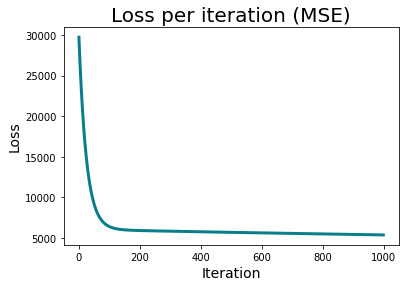

In [12]:
xs = np.arange(len(model.loss))
ys = model.loss

plt.plot(xs, ys, lw=3, c='#087E8B')
plt.title('Loss per iteration (MSE)', size=20)
plt.xlabel('Iteration', size=14)
plt.ylabel('Loss', size=14)
plt.show()

partial_w printing [-1.86081167 -0.10932439 -4.98456952 -3.71875091 -1.31370059 -0.90096535
  3.11643901 -3.2784867  -4.48542634 -3.52161783]
partial_d printing -307.4730878186969
partial_w printing [-1.40109818 -0.04224962 -4.42068767 -3.33102525 -1.46173908 -1.12718263
  2.78853908 -3.1298463  -4.07835449 -2.91096596]
partial_d printing 0.030714767988606596
partial_w printing [-1.38678147 -0.03288846 -4.39350601 -3.30861824 -1.44009211 -1.1065055
  2.76704292 -3.0995048  -4.04818504 -2.8849623 ]
partial_d printing 0.026309052926111687
partial_w printing [-1.37259085 -0.02362791 -4.36653167 -3.28638664 -1.41866771 -1.08604887
  2.74572493 -3.06944194 -4.01826796 -2.85917669]
partial_d printing 0.026123232093972184
partial_w printing [-1.35853126 -0.01446781 -4.33977014 -3.26433389 -1.3974615  -1.06580733
  2.72458768 -3.03965681 -3.98860611 -2.83361515]
partial_d printing 0.025938877247229618
partial_w printing [-1.3446015  -0.00540724 -4.31321959 -3.24245844 -1.37647143 -1.04577883
 

partial_d printing 0.007682145477168522
partial_w printing [-0.1058656   0.64709989 -1.59563575 -1.04242848  0.30702919  0.49430836
  0.68522153 -0.37982112 -1.13349162 -0.42332837]
partial_d printing 0.007641462007021319
partial_w printing [-0.10377098  0.64735106 -1.58912585 -1.03736633  0.30897795  0.49570126
  0.68099424 -0.37530262 -1.12756319 -0.41862231]
partial_d printing 0.007601061148909304
partial_w printing [-0.10169764  0.64758786 -1.5826562  -1.03233773  0.31089563  0.49706445
  0.67679903 -0.37082869 -1.12167924 -0.41395533]
partial_d printing 0.007560940604037597
partial_w printing [-0.09964539  0.64781042 -1.57622646 -1.02734241  0.31278254  0.49839827
  0.67263565 -0.3663989  -1.11583938 -0.4093271 ]
partial_d printing 0.007521098093700074
partial_w printing [-0.09761403  0.64801891 -1.56983634 -1.02238011  0.31463901  0.49970302
  0.66850383 -0.36201286 -1.11004322 -0.40473728]
partial_d printing 0.007481531358866483
partial_w printing [-0.09560338  0.64821347 -1.563

partial_d printing 0.0028016568549507222
partial_w printing [ 0.06627711  0.52193226 -0.75015407 -0.41607709  0.34418981  0.43444013
  0.20972752  0.01341269 -0.45431247  0.06177232]
partial_d printing 0.002791077550484142
partial_w printing [ 0.06636476  0.52107016 -0.74806092 -0.41464993  0.34360239  0.4335273
  0.20880802  0.01375484 -0.45292588  0.06251527]
partial_d printing 0.0027805504273060344
partial_w printing [ 0.06644998  0.52020789 -0.74597602 -0.41322932  0.34301355  0.43261378
  0.2078938   0.01409196 -0.45154645  0.06325216]
partial_d printing 0.0027700751419185428
partial_w printing [ 0.06653279  0.51934546 -0.7438993  -0.41181521  0.34242331  0.43169962
  0.20698483  0.0144241  -0.45017414  0.06398304]
partial_d printing 0.002759651353362926
partial_w printing [ 0.06661321  0.5184829  -0.74183073 -0.41040756  0.3418317   0.43078483
  0.20608106  0.01475132 -0.44880889  0.06470796]
partial_d printing 0.0027492787235924975
partial_w printing [ 0.06669126  0.51762021 -0.

partial_w printing [ 0.05669535  0.3556422  -0.44305387 -0.21839622  0.22228632  0.25896799
  0.0933456   0.0262346  -0.26809443  0.13350117]
partial_d printing 0.0013720222886473062
partial_w printing [ 0.05658852  0.35493171 -0.44199738 -0.21776329  0.22176997  0.25824777
  0.09300933  0.02616567 -0.26750521  0.13360591]
partial_d printing 0.0013676221472756602
partial_w printing [ 0.05648154  0.35422234 -0.44094391 -0.21713253  0.2212547   0.25752908
  0.09267444  0.02609634 -0.26691793  0.1337093 ]
partial_d printing 0.0013632381465560849
partial_w printing [ 0.05637443  0.35351409 -0.43989343 -0.21650394  0.22074051  0.25681194
  0.09234091  0.02602663 -0.26633258  0.13381134]
partial_d printing 0.0013588702097071313
partial_w printing [ 0.05626718  0.35280696 -0.43884594 -0.2158775   0.2202274   0.25609634
  0.09200873  0.02595655 -0.26574915  0.13391203]
partial_d printing 0.0013545182606175545
partial_w printing [ 0.0561598   0.35210096 -0.43780143 -0.2152532   0.21971538  0.25

  0.04449976  0.00966979 -0.17612944  0.13562951]
partial_d printing 0.000716700773113712
partial_w printing [ 0.03455509  0.23052941 -0.27337176 -0.12192631  0.13708028  0.13958936
  0.04433996  0.00959773 -0.17580161  0.13557815]
partial_d printing 0.000714525080429834
partial_w printing [ 0.03446065  0.23004293 -0.27276241 -0.12160056  0.13677702  0.13915877
  0.04418067  0.00952581 -0.17547457  0.13552642]
partial_d printing 0.0007123562396052891
partial_w printing [ 0.03436636  0.22955741 -0.27215455 -0.12127578  0.13647462  0.1387293
  0.04402187  0.00945405 -0.17514834  0.13547434]
partial_d printing 0.000710194226038632
partial_w printing [ 0.03427222  0.22907282 -0.27154819 -0.12095196  0.13617307  0.13830097
  0.04386357  0.00938244 -0.17482291  0.13542191]
partial_d printing 0.0007080390154137617
partial_w printing [ 0.03417823  0.22858919 -0.27094331 -0.1206291   0.13587235  0.13787377
  0.04370576  0.00931099 -0.17449827  0.13536912]
partial_d printing 0.000705890583408458

partial_d printing 0.022518797536524224
partial_w printing [-1.26683876  0.04482521 -4.16415521 -3.1197224  -1.25976184 -0.93457292
  2.58625519 -2.84540566 -3.79452984 -2.66649166]
partial_d printing 0.022933483092784337
partial_w printing [-1.26422179  0.04650761 -4.15912041 -3.11557877 -1.25584577 -0.93084516
  2.58229737 -2.83986276 -3.78897815 -2.66171327]
partial_d printing 0.023258356790177875
partial_w printing [-1.26160977  0.04818629 -4.15409361 -3.11144185 -1.25193771 -0.92712525
  2.57834631 -2.83433014 -3.78343599 -2.65694331]
partial_d printing 0.02351139245969684
partial_w printing [-1.25900266  0.04986126 -4.1490748  -3.10731162 -1.24803763 -0.9234132
  2.57440199 -2.82880778 -3.77790333 -2.65218173]
partial_d printing 0.02370696909729974
partial_w printing [-1.25640045  0.05153254 -4.14406392 -3.10318804 -1.24414553 -0.919709
  2.57046438 -2.82329565 -3.77238014 -2.6474285 ]
partial_d printing 0.023856589840847757
partial_w printing [-1.2538031   0.05320013 -4.13906096

partial_w printing [-0.78178853  0.34374905 -3.19996625 -2.32924758 -0.55061216 -0.26530856
  1.83899284 -1.81776801 -2.74738596 -1.7690014 ]
partial_d printing 0.018154607343669558
partial_w printing [-0.78007378  0.34474585 -3.19641577 -2.32635084 -0.54818101 -0.26304137
  1.83628899 -1.814134   -2.74360104 -1.7657751 ]
partial_d printing 0.01813061444568185
partial_w printing [-0.77836225  0.34574023 -3.19287064 -2.32345858 -0.54575509 -0.26077931
  1.83358963 -1.81050678 -2.73982244 -1.76255435]
partial_d printing 0.018106659642519975
partial_w printing [-0.77665391  0.3467322  -3.18933084 -2.3205708  -0.54333439 -0.25852238
  1.83089476 -1.80688633 -2.73605015 -1.75933914]
partial_d printing 0.018082742868595975
partial_w printing [-0.77494878  0.34772176 -3.18579636 -2.31768749 -0.5409189  -0.25627056
  1.82820437 -1.80327263 -2.73228415 -1.75612946]
partial_d printing 0.01805886405840304
partial_w printing [-0.77324683  0.34870892 -3.1822672  -2.31480865 -0.53850862 -0.25402385


partial_w printing [-0.47827528  0.50920215 -2.54595383 -1.7982395  -0.13344932  0.11867999
  1.3493117  -1.17411785 -2.06235969 -1.18848175]
partial_d printing 0.013774713643026638
partial_w printing [-0.47713222  0.50977157 -2.54336668 -1.79615133 -0.13194089  0.1200433
  1.34741391 -1.17169121 -2.05970632 -1.18625   ]
partial_d printing 0.013757575297557702
partial_w printing [-0.47599133  0.51033938 -2.54078325 -1.79406628 -0.13043592  0.12140323
  1.34551921 -1.16926916 -2.05705728 -1.18402205]
partial_d printing 0.013740463309462934
partial_w printing [-0.4748526   0.51090559 -2.53820353 -1.79198434 -0.1289344   0.12275978
  1.34362759 -1.16685168 -2.05441256 -1.18179791]
partial_d printing 0.013723377633971622
partial_w printing [-0.47371604  0.5114702  -2.53562751 -1.78990551 -0.12743633  0.12411297
  1.34173905 -1.16443876 -2.05177215 -1.17957755]
partial_d printing 0.013706318226302102
partial_w printing [-0.47258164  0.51203322 -2.53305518 -1.78782977 -0.1259417   0.1254628


  1.00975338 -0.75178051 -1.58766998 -0.79247195]
partial_d printing 0.010679205457797972
partial_w printing [-0.27888209  0.59842295 -2.07164078 -1.41772413  0.11847532  0.34153272
  1.00840208 -0.75015615 -1.5857807  -0.79091208]
partial_d printing 0.010666747178243436
partial_w printing [-0.27812135  0.59871312 -2.06971754 -1.4161924   0.11938218  0.34231009
  1.00705292 -0.7485349  -1.58389442 -0.78935484]
partial_d printing 0.010654307353526732
partial_w printing [-0.2773621   0.59900222 -2.06779691 -1.41466287  0.12028675  0.34308524
  1.00570591 -0.74691675 -1.58201112 -0.78780023]
partial_d printing 0.010641885952771412
partial_w printing [-0.27660431  0.59929027 -2.06587889 -1.41313552  0.12118904  0.34385817
  1.00436104 -0.7453017  -1.5801308  -0.78624824]
partial_d printing 0.010629482945165447
partial_w printing [-0.275848    0.59957726 -2.06396347 -1.41161035  0.12208905  0.3446289
  1.0030183  -0.74368975 -1.57825346 -0.78469887]
partial_d printing 0.010617098299927722
p

partial_w printing [-0.14930048  0.63865353 -1.72350454 -1.14246815  0.26347779  0.46111265
  0.76988767 -0.4731648  -1.25209876 -0.51849425]
partial_d printing 0.00844333732492688
partial_w printing [-0.14879442  0.63876368 -1.7220407  -1.14132062  0.26399683  0.4615153
  0.76891216 -0.47207846 -1.2507326  -0.51739438]
partial_d printing 0.008434125924934113
partial_w printing [-0.14828937  0.63887313 -1.72057873 -1.14017465  0.26451437  0.46191651
  0.76793816 -0.47099424 -1.24936852 -0.51629634]
partial_d printing 0.00842492759077766
partial_w printing [-0.14778534  0.63898188 -1.71911863 -1.13903023  0.2650304   0.46231626
  0.76696566 -0.46991214 -1.24800654 -0.51520014]
partial_d printing 0.008415742301011608
partial_w printing [-0.14728231  0.63908993 -1.71766038 -1.13788737  0.26554493  0.46271457
  0.76599467 -0.46883215 -1.24664663 -0.51410577]
partial_d printing 0.008406570034269917
partial_w printing [-0.14678028  0.63919729 -1.716204   -1.13674606  0.26605795  0.46311145
 

partial_w printing [-1.41647301 -0.03325761 -4.42459968 -3.32795924 -1.41617211 -1.07674206
  2.78201341 -3.09501505 -4.06486    -2.92055332]
partial_d printing -25.08472649030694
partial_w printing [-1.41546322 -0.03297925 -4.423186   -3.32691994 -1.41602317 -1.07673854
  2.78108863 -3.09422366 -4.06364892 -2.91908523]
partial_d printing -24.582504343300496
partial_w printing [-1.41446803 -0.03270282 -4.42178994 -3.32589265 -1.41586876 -1.07672703
  2.78017392 -3.09343624 -4.06245025 -2.91763633]
partial_d printing -24.090326850481173
partial_w printing [-1.41348714 -0.03242826 -4.42041113 -3.32487711 -1.415709   -1.07670769
  2.77926909 -3.0926527  -4.06126374 -2.91620622]
partial_d printing -23.607993115997388
partial_w printing [-1.41252028 -0.03215556 -4.41904924 -3.3238731  -1.415544   -1.07668069
  2.77837394 -3.09187297 -4.06008914 -2.91479453]
partial_d printing -23.13530626196971
partial_w printing [-1.41156715 -0.03188467 -4.41770392 -3.32288039 -1.41537386 -1.07664618
  2.7

partial_w printing [-1.324124    0.00814294 -4.27358983 -3.20972273 -1.3446049  -1.01529418
  2.67225612 -2.96567309 -3.91511084 -2.770655  ]
partial_d printing -0.38186212952384446
partial_w printing [-1.32384007  0.00832072 -4.27305513 -3.20928439 -1.34420035 -1.01491075
  2.67183778 -2.96509348 -3.91452529 -2.7701438 ]
partial_d printing -0.37371878641265244
partial_w printing [-1.32355643  0.00849843 -4.27252079 -3.20884631 -1.3437958  -1.01452728
  2.67141966 -2.96451403 -3.91394004 -2.76963299]
partial_d printing -0.36573838344429016
partial_w printing [-1.32327308  0.00867608 -4.27198681 -3.20840849 -1.34339125 -1.01414376
  2.67100178 -2.96393475 -3.91335509 -2.76912257]
partial_d printing -0.35791766175953976
partial_w printing [-1.32299     0.00885366 -4.27145319 -3.20797093 -1.34298669 -1.0137602
  2.67058412 -2.96335563 -3.91277042 -2.76861254]
partial_d printing -0.35025342767735324
partial_w printing [-1.32270719  0.00903117 -4.27091992 -3.20753361 -1.34258213 -1.0133766


partial_w printing [-1.26643846  0.0450709  -4.16334663 -3.11905936 -1.25917215 -0.93401708
  2.5856301  -2.84454806 -3.79365378 -2.66574471]
partial_d printing 0.01932626835102535
partial_w printing [-1.26617674  0.0452391  -4.16284315 -3.11864501 -1.25878071 -0.93364449
  2.58523435 -2.8439939  -3.79309867 -2.66526686]
partial_d printing 0.01943079099452115
partial_w printing [-1.26591506  0.04540725 -4.16233975 -3.11823074 -1.25838934 -0.93327197
  2.58483868 -2.84343984 -3.79254366 -2.66478911]
partial_d printing 0.019533154550197485
partial_w printing [-1.26565344  0.04557538 -4.16183643 -3.11781653 -1.25799806 -0.93289953
  2.58444306 -2.84288589 -3.79198875 -2.66431143]
partial_d printing 0.01963340221150492
partial_w printing [-1.26539187  0.04574346 -4.1613332  -3.11740239 -1.25760686 -0.93252716
  2.58404752 -2.84233204 -3.79143393 -2.66383385]
partial_d printing 0.019731576308143282
partial_w printing [-1.26513035  0.0459115  -4.16083005 -3.11698832 -1.25721573 -0.93215487
 

partial_d printing 0.023922436271555807
partial_w printing [-1.21078969  0.08070996 -4.05594843 -3.03070237 -1.17607675 -0.85497903
  2.50131883 -2.72667446 -3.67540188 -2.56400468]
partial_d printing 0.023920471973148647
partial_w printing [-1.21053842  0.08087026 -4.05546193 -3.03030227 -1.17570233 -0.85462318
  2.50093743 -2.72614216 -3.674867   -2.56354469]
partial_d printing 0.02391848072738223
partial_w printing [-1.21028719  0.08103052 -4.05497551 -3.02990223 -1.17532799 -0.8542674
  2.5005561  -2.72560996 -3.67433221 -2.56308477]
partial_d printing 0.023916463083968803
partial_w printing [-1.21003601  0.08119076 -4.05448917 -3.02950226 -1.17495372 -0.8539117
  2.50017483 -2.72507786 -3.67379751 -2.56262493]
partial_d printing 0.023914419581655157
partial_w printing [-1.20978488  0.08135095 -4.0540029  -3.02910235 -1.17457954 -0.85355607
  2.49979362 -2.72454586 -3.67326291 -2.56216517]
partial_d printing 0.023912350748433883
partial_w printing [-1.20953379  0.08151111 -4.053516

partial_w printing [-1.15903085  0.11360331 -3.95543209 -2.94806584 -1.09911954 -0.78189485
  2.42262124 -2.61702745 -3.56504646 -2.46913497]
partial_d printing 0.023297600295224374
partial_w printing [-1.15878916  0.11375629 -3.95496127 -2.9476789  -1.09876101 -0.78155464
  2.42225312 -2.61651546 -3.5645303  -2.46869142]
partial_d printing 0.023294393455951072
partial_w printing [-1.15854752  0.11390924 -3.95449052 -2.94729203 -1.09840255 -0.7812145
  2.42188506 -2.61600356 -3.56401424 -2.46824795]
partial_d printing 0.023291186753605676
partial_w printing [-1.15830593  0.11406215 -3.95401984 -2.94690522 -1.09804416 -0.78087443
  2.42151706 -2.61549176 -3.56349826 -2.46780455]
partial_d printing 0.023287980195797794
partial_w printing [-1.15806438  0.11421503 -3.95354923 -2.94651848 -1.09768584 -0.78053443
  2.42114913 -2.61498006 -3.56298237 -2.46736123]
partial_d printing 0.023284773790018524
partial_w printing [-1.15782288  0.11436787 -3.9530787  -2.94613179 -1.0973276  -0.78019451

  3.0090251  -3.2284209  -4.35184482 -3.32251567]
partial_d printing -208.08581934846487
partial_w printing [-1.71064221 -0.08692413 -4.79972419 -3.59140073 -1.36029027 -0.97299421
  3.00856739 -3.22820012 -4.35127435 -3.32167232]
partial_d printing -207.66958915294887
partial_w printing [-1.71001192 -0.08682746 -4.79894484 -3.59086244 -1.36047623 -0.97328641
  3.00811051 -3.22797967 -4.35070489 -3.32083055]
partial_d printing -207.25419142999084
partial_w printing [-1.70938283 -0.08673094 -4.79816694 -3.59032514 -1.36066173 -0.97357794
  3.00765445 -3.22775954 -4.35013646 -3.31999037]
partial_d printing -206.83962451462267
partial_w printing [-1.70875494 -0.08663458 -4.79739049 -3.58978882 -1.36084678 -0.97386881
  3.00719922 -3.22753972 -4.34956904 -3.31915176]
partial_d printing -206.4258867452064
partial_w printing [-1.70812825 -0.08653837 -4.79661548 -3.58925348 -1.36103137 -0.97415901
  3.00674482 -3.22732023 -4.34900263 -3.31831472]
partial_d printing -206.0129764634275
partial_

partial_w printing [-1.60393986 -0.07004054 -4.66710046 -3.49953582 -1.38990051 -1.0204855
  2.9304167  -3.18904671 -4.25362369 -3.1786711 ]
partial_d printing -138.02986355392008
partial_w printing [-1.60351135 -0.06997005 -4.66656428 -3.49916306 -1.39000969 -1.02066595
  2.93009866 -3.18887994 -4.25322504 -3.17809422]
partial_d printing -137.7537473449663
partial_w printing [-1.60308364 -0.06989966 -4.66602906 -3.49879096 -1.39011857 -1.02084595
  2.92978118 -3.18871339 -4.25282707 -3.17751839]
partial_d printing -137.4781833767507
partial_w printing [-1.60265673 -0.06982937 -4.6654948  -3.49841951 -1.39022714 -1.02102552
  2.92946424 -3.18854704 -4.25242978 -3.17694362]
partial_d printing -137.20317054477653
partial_w printing [-1.60223062 -0.06975918 -4.66496151 -3.49804871 -1.39033542 -1.02120464
  2.92914786 -3.18838091 -4.25203316 -3.17636989]
partial_d printing -136.92870774675626
partial_w printing [-1.6018053  -0.0696891  -4.66442917 -3.49767857 -1.39044339 -1.02138333
  2.92

partial_w printing [-1.52556706 -0.05655187 -4.56824239 -3.43050973 -1.40771773 -1.05121759
  2.87132233 -3.15643616 -4.17927591 -3.07258829]
partial_d printing -88.31501109528227
partial_w printing [-1.52528264 -0.05650009 -4.56787986 -3.4302552  -1.40777217 -1.05131833
  2.87110347 -3.1563078  -4.17899928 -3.07220058]
partial_d printing -88.13832612099156
partial_w printing [-1.52499873 -0.05644838 -4.56751796 -3.43000108 -1.40782641 -1.05141879
  2.87088496 -3.15617958 -4.17872308 -3.07181355]
partial_d printing -87.96199452223897
partial_w printing [-1.52471534 -0.05639674 -4.56715667 -3.42974739 -1.40788047 -1.05151897
  2.87066681 -3.15605149 -4.17844732 -3.07142719]
partial_d printing -87.7860155922637
partial_w printing [-1.52443246 -0.05634516 -4.566796   -3.42949411 -1.40793433 -1.05161886
  2.87044901 -3.15592354 -4.17817198 -3.0710415 ]
partial_d printing -87.61038862571854
partial_w printing [-1.52415008 -0.05629365 -4.56643594 -3.42924126 -1.40798799 -1.05171847
  2.87023

  2.83276752 -3.13252834 -4.13032393 -3.00517304]
partial_d printing -58.45985594857868
partial_w printing [-1.47626292 -0.0470795  -4.50473586 -3.38567539 -1.41535811 -1.06678444
  2.83260827 -3.13242313 -4.13012065 -3.004899  ]
partial_d printing -58.342882256286025
partial_w printing [-1.47606541 -0.04703904 -4.50447809 -3.38549218 -1.41537961 -1.06683719
  2.83244926 -3.132318   -4.12991765 -3.00462541]
partial_d printing -58.226142515326785
partial_w printing [-1.47586824 -0.04699862 -4.50422074 -3.38530925 -1.41540098 -1.06688975
  2.83229048 -3.13221297 -4.12971494 -3.00435226]
partial_d printing -58.10963625779184
partial_w printing [-1.47567141 -0.04695825 -4.50396379 -3.3851266  -1.41542223 -1.06694213
  2.83213193 -3.13210803 -4.12951251 -3.00407956]
partial_d printing -57.99336301670792
partial_w printing [-1.47547492 -0.04691792 -4.50370725 -3.38494423 -1.41544335 -1.06699432
  2.83197362 -3.13200318 -4.12931037 -3.00380729]
partial_d printing -57.877322326035724
partial_w

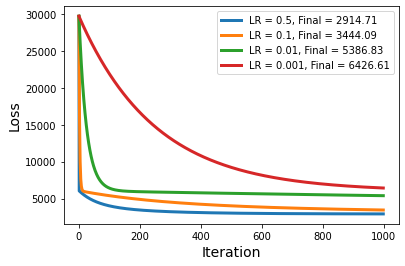

In [13]:
losses = {}
for lr in [0.5, 0.1, 0.01, 0.001]:
    model = LinearRegression(learning_rate=lr)
    model.fit(X_train, y_train)
    losses[f'LR={str(lr)}'] = model.loss
    
    
xs = np.arange(len(model.loss))

plt.plot(xs, losses['LR=0.5'], lw=3, label=f"LR = 0.5, Final = {losses['LR=0.5'][-1]:.2f}")
plt.plot(xs, losses['LR=0.1'], lw=3, label=f"LR = 0.1, Final = {losses['LR=0.1'][-1]:.2f}")
plt.plot(xs, losses['LR=0.01'], lw=3, label=f"LR = 0.01, Final = {losses['LR=0.01'][-1]:.2f}")
plt.plot(xs, losses['LR=0.001'], lw=3, label=f"LR = 0.001, Final = {losses['LR=0.001'][-1]:.2f}")
# plt.title('Loss per iteration (MSE) for different learning rates with python decimal operations', size=20)
plt.xlabel('Iteration', size=14)
plt.ylabel('Loss', size=14)
plt.legend()
plt.savefig("python-mse.pdf")
plt.show()

In [18]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
model = LinearRegression(learning_rate=0.5)
model.fit(X_train, y_train)
preds = model.predict(X_test)

model._mean_squared_error(y_test, preds)

partial_w printing [-1.86081167 -0.10932439 -4.98456952 -3.71875091 -1.31370059 -0.90096535
  3.11643901 -3.2784867  -4.48542634 -3.52161783]
partial_d printing -307.4730878186969
partial_w printing [-1.40109818 -0.04224962 -4.42068767 -3.33102525 -1.46173908 -1.12718263
  2.78853908 -3.1298463  -4.07835449 -2.91096596]
partial_d printing 0.030714767988606596
partial_w printing [-1.38678147 -0.03288846 -4.39350601 -3.30861824 -1.44009211 -1.1065055
  2.76704292 -3.0995048  -4.04818504 -2.8849623 ]
partial_d printing 0.026309052926111687
partial_w printing [-1.37259085 -0.02362791 -4.36653167 -3.28638664 -1.41866771 -1.08604887
  2.74572493 -3.06944194 -4.01826796 -2.85917669]
partial_d printing 0.026123232093972184
partial_w printing [-1.35853126 -0.01446781 -4.33977014 -3.26433389 -1.3974615  -1.06580733
  2.72458768 -3.03965681 -3.98860611 -2.83361515]
partial_d printing 0.025938877247229618
partial_w printing [-1.3446015  -0.00540724 -4.31321959 -3.24245844 -1.37647143 -1.04577883
 

partial_w printing [-0.08585406  0.64898245 -1.53231009 -0.99328503  0.32515602  0.50693836
  0.64436086 -0.33659269 -1.07616358 -0.37798687]
partial_d printing 0.007249798184727655
partial_w printing [-0.08396369  0.64909649 -1.52618864 -0.9885466   0.32680808  0.50804821
  0.64044263 -0.33250168 -1.07066315 -0.3736569 ]
partial_d printing 0.007212100254057037
partial_w printing [-0.08209272  0.64919759 -1.52010439 -0.98383914  0.32843213  0.5091314
  0.63655388 -0.32845127 -1.06520353 -0.3693628 ]
partial_d printing 0.007174660719106176
partial_w printing [-0.08024099  0.64928591 -1.51405703 -0.97916241  0.33002848  0.51018822
  0.63269439 -0.32444108 -1.05978438 -0.36510425]
partial_d printing 0.007137477491308091
partial_w printing [-0.0784083   0.64936157 -1.50804628 -0.97451616  0.33159742  0.51121896
  0.6288639  -0.32047074 -1.05440536 -0.36088096]
partial_d printing 0.007100548500277964
partial_w printing [-0.0765945   0.64942472 -1.50207185 -0.96990016  0.33313923  0.51222391

partial_w printing [ 0.06618699  0.52279416 -0.7522555  -0.41751084  0.34477576  0.43535225
  0.21065234  0.01306546 -0.45570628  0.06102327]
partial_d printing 0.0028016568549507222
partial_w printing [ 0.06627711  0.52193226 -0.75015407 -0.41607709  0.34418981  0.43444013
  0.20972752  0.01341269 -0.45431247  0.06177232]
partial_d printing 0.002791077550484142
partial_w printing [ 0.06636476  0.52107016 -0.74806092 -0.41464993  0.34360239  0.4335273
  0.20880802  0.01375484 -0.45292588  0.06251527]
partial_d printing 0.0027805504273060344
partial_w printing [ 0.06644998  0.52020789 -0.74597602 -0.41322932  0.34301355  0.43261378
  0.2078938   0.01409196 -0.45154645  0.06325216]
partial_d printing 0.0027700751419185428
partial_w printing [ 0.06653279  0.51934546 -0.7438993  -0.41181521  0.34242331  0.43169962
  0.20698483  0.0144241  -0.45017414  0.06398304]
partial_d printing 0.002759651353362926
partial_w printing [ 0.06661321  0.5184829  -0.74183073 -0.41040756  0.3418317   0.43078

partial_w printing [ 0.055513    0.34788846 -0.4315962  -0.21155194  0.21666608  0.25113025
  0.08972095  0.02545595 -0.26171801  0.13458008]
partial_d printing 0.0013244959735098493
partial_w printing [ 0.0554048   0.34719031 -0.43057219 -0.21094239  0.21616168  0.25042697
  0.08939938  0.02538308 -0.26114958  0.13467035]
partial_d printing 0.001320269240586099
partial_w printing [ 0.0552965   0.34649328 -0.42955107 -0.21033491  0.21565837  0.24972523
  0.08907911  0.02530989 -0.26058297  0.13475937]
partial_d printing 0.001316057830985927
partial_w printing [ 0.05518811  0.34579738 -0.42853283 -0.2097295   0.21515615  0.24902502
  0.08876011  0.0252364  -0.26001819  0.13484713]
partial_d printing 0.001311861673221568
partial_w printing [ 0.05507961  0.3451026  -0.42751744 -0.20912613  0.21465502  0.24832636
  0.0884424   0.02516259 -0.25945522  0.13493364]
partial_d printing 0.0013076806962329516
partial_w printing [ 0.05497102  0.34440894 -0.42650491 -0.20852481  0.21415499  0.24762

partial_w printing [ 0.03160865  0.21542576 -0.25459304 -0.11196453  0.12778755  0.12635906
  0.03948003  0.00737358 -0.16572088  0.13375753]
partial_d printing 0.0006483914280412013
partial_w printing [ 0.03151912  0.21496894 -0.25402946 -0.11166806  0.1275105   0.12596341
  0.03933573  0.00730668 -0.1654182   0.1336955 ]
partial_d printing 0.0006464294936210765
partial_w printing [ 0.03142975  0.21451303 -0.25346724 -0.11137245  0.12723423  0.12556882
  0.03919186  0.00723995 -0.16511625  0.13363318]
partial_d printing 0.0006444736581526159
partial_w printing [ 0.03134053  0.21405801 -0.25290638 -0.1110777   0.12695875  0.12517527
  0.03904843  0.00717337 -0.16481501  0.13357057]
partial_d printing 0.0006425239003992468
partial_w printing [ 0.03125147  0.2136039  -0.25234688 -0.11078381  0.12668405  0.12478277
  0.03890544  0.00710696 -0.16451449  0.13350767]
partial_d printing 0.0006405801993839766
partial_w printing [ 0.03116257  0.21315069 -0.25178873 -0.11049077  0.12641013  0.12

2866.910611363957

In [15]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# lr_model = LinearRegression()
# lr_model.fit(X_train, y_train)
# lr_preds = lr_model.predict(X_test)

# mean_squared_error(y_test, lr_preds)

In [16]:


X_train_num = np.dot(X_train,1000).astype(int)
X_test_num = np.dot(X_test,1000).astype(int)
y_train_num = y_train
y_test_num = y_test

In [17]:
model = LinearRegression()
model.fit(X_train_num, y_train)
preds = model.predict(X_test_num)
mean_squared_error(y_test, preds)

partial_w printing [-1826.49858357  -114.76487252 -4959.59773371 -3700.74220963
 -1317.86968839  -904.34560907  3059.09348442 -3329.86402266
 -4461.96033994 -3497.65439093]
partial_d printing -307.4730878186969
partial_w printing [ 318341.65226525  205429.74726127  586961.42491345  487357.49744689
  446179.6098545   424341.82106878 -463082.77993981  643209.95555217
  645730.33379868  568717.4388752 ]
partial_d printing 329.0319870956346
partial_w printing [-5.58294117e+07 -4.25535512e+07 -9.01455617e+07 -7.59793310e+07
 -9.10070111e+07 -8.97219525e+07  7.65421681e+07 -1.17075049e+08
 -1.07679023e+08 -9.50986222e+07]
partial_d printing -84913.73755478465
partial_w printing [ 9.80244989e+09  7.66697928e+09  1.52382092e+10  1.28141898e+10
  1.67940173e+10  1.66748282e+10 -1.31632989e+10  2.08406661e+10
  1.86958222e+10  1.64158241e+10]
partial_d printing 13493882.484309364
partial_w printing [-1.72461719e+12 -1.35172834e+12 -2.65309856e+12 -2.22571095e+12
 -3.00695092e+12 -2.99010352e+12 

<ipython-input-6-e42b4d11c682>:22: RuntimeWarning: overflow encountered in double_scalars
  error += (y[i] - y_hat[i]) ** 2


partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d print

partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d print

partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d print

partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d print

partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d print

NameError: name 'mean_squared_error' is not defined